In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Desktop/ASS-9.csv")
df = df.iloc[:16,:]

In [17]:
df

,Actual,Probability
0,1.0,0.69
1,0.0,0.43
2,0.0,0.32
3,1.0,0.87
4,1.0,0.56
5,1.0,0.66
6,0.0,0.32
7,1.0,0.76
8,1.0,0.87
9,0.0,0.45


In [18]:
threshold = [0.4,0.5,0.6,0.7,0.8]

In [19]:
df["Probability"] = df["Probability"].astype("float64")

In [20]:
from sklearn import metrics

In [21]:
for i in df["Probability"]:
    print(i)

0.69
0.43
0.32
0.87
0.56
0.66
0.32
0.76
0.87
0.45
0.12
0.98
0.21
0.13
0.82
0.92


TPR  1.0
TNR  0.7142857142857143
FNR  0.0
FPR  0.2857142857142857


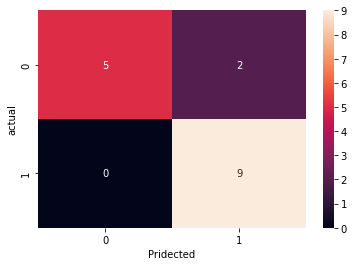

TPR  1.0
TNR  1.0
FNR  0.0
FPR  0.0


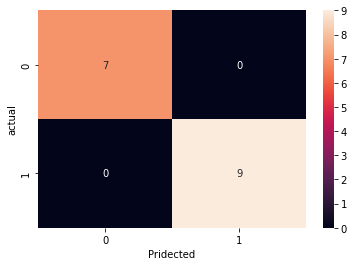

TPR  0.8888888888888888
TNR  1.0
FNR  0.1111111111111111
FPR  0.0


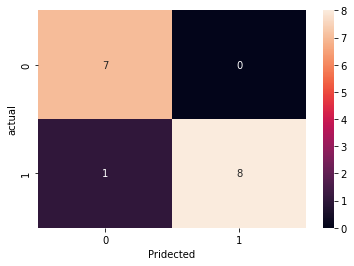

TPR  0.6666666666666666
TNR  1.0
FNR  0.3333333333333333
FPR  0.0


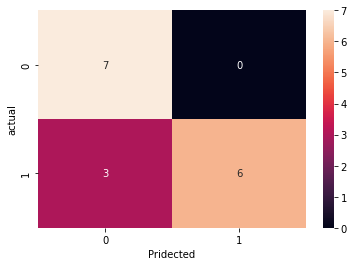

TPR  0.5555555555555556
TNR  1.0
FNR  0.4444444444444444
FPR  0.0


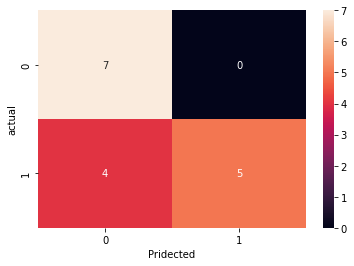

[1.0, 1.0, 0.8888888888888888, 0.6666666666666666, 0.5555555555555556]
[0.2857142857142857, 0.0, 0.0, 0.0, 0.0]


Text(0, 0.5, 'TPR')

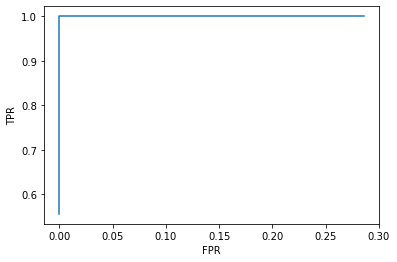

In [22]:
threshold = [0.4,0.5,0.6,0.7,0.8]
TPR = []
FPR = []
for i in threshold:
    df["Predicted"+str(i)] = [1 if j>=i else 0 for j in df["Probability"] ]
    tn,fp,fn,tp = metrics.confusion_matrix(df["Actual"].values.ravel() , df["Predicted"+str(i)].values.ravel()).ravel()  
    plt.figure()
    sns.heatmap( metrics.confusion_matrix(df["Actual"].values.ravel() , df["Predicted"+str(i)].values.ravel()),annot = True)
    plt.xlabel("Pridected")
    plt.ylabel("actual")
    
   
    tpr = tp/(tp+fn)
    tnr = tn/(tn+fp)
    fnr = fn/(fn+tp)
    fpr = fp/(fp+tn)
    TPR.append(tpr)
    FPR.append(fpr)
    print("TPR ",tpr)
    print("TNR ",tnr)
    print("FNR ",fnr)
    print("FPR ",fpr)
     
    plt.show()
print(TPR)
print(FPR)
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [23]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Desktop/ASS-9-2.csv")
Y_true = df["Actual"].values.ravel()
Y_pred = df["Predicted"].values.ravel()

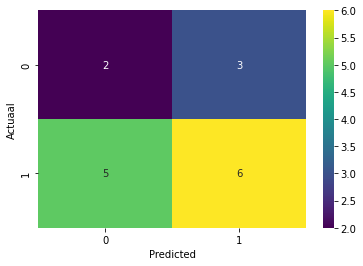

In [24]:
tn , fp , fn , tp = metrics.confusion_matrix(Y_true,Y_pred).ravel()
c_f = metrics.confusion_matrix(Y_true,Y_pred)

sns.heatmap(c_f,annot = True , cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actuaal")
plt.show()


In [25]:
print("TP",tp)
print("FP",fp)
print("TN",tn)
print("TP",tp)

TP 6
FP 3
TN 2
TP 6


In [26]:
print(metrics.classification_report(Y_true , Y_pred))

              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.67      0.55      0.60        11

    accuracy                           0.50        16
   macro avg       0.48      0.47      0.47        16
weighted avg       0.55      0.50      0.52        16



In [27]:
# load_dataset
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/Health_insurance - Health_insurance.csv")

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0.0,yes,southwest,16884.924$
1,18,male,33.77,1.0,no,southeast,1725.5523$
2,28,male,33,3.0,no,southeast,4449.462$
3,33,male,22.705,0.0,no,northwest,21984.47061$
4,32,male,28.88,0.0,no,northwest,3866.8552$


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1563 non-null   object 
 1   sex       1563 non-null   object 
 2   bmi       1562 non-null   object 
 3   children  1542 non-null   float64
 4   smoker    1563 non-null   object 
 5   region    1563 non-null   object 
 6   charges   1563 non-null   object 
dtypes: float64(1), object(6)
memory usage: 85.6+ KB


In [30]:
df.shape

(1563, 7)

In [31]:
df.isnull().sum()

age          0
sex          0
bmi          1
children    21
smoker       0
region       0
charges      0
dtype: int64

In [32]:
for i in df.columns:
    print(df[i].value_counts())

19     83
18     81
24     37
47     36
22     36
54     35
48     35
28     35
27     34
45     34
23     34
26     33
55     33
51     33
25     33
43     32
59     32
46     32
49     32
20     31
40     31
29     31
21     31
44     31
41     31
32     31
30     31
37     31
31     30
60     30
42     30
52     30
53     30
63     30
50     29
33     29
36     29
57     29
34     29
35     29
56     29
61     28
39     28
38     27
62     26
58     26
64     25
" "     1
Name: age, dtype: int64
male      794
female    767
0           1
%           1
Name: sex, dtype: int64
32.3      13
34.1      12
28.31     12
30.8      11
31.35     10
          ..
43.12      1
34.295     1
45.43      1
23.65      1
30.97      1
Name: bmi, Length: 550, dtype: int64
0.0    658
1.0    372
2.0    278
3.0    187
4.0     28
5.0     19
Name: children, dtype: int64
no     1237
yes     324
-         1
0         1
Name: smoker, dtype: int64
southeast    416
southwest    387
northwest    379
northeast    37

In [33]:
df.dtypes

age          object
sex          object
bmi          object
children    float64
smoker       object
region       object
charges      object
dtype: object

In [34]:
df["age"] = pd.to_numeric(df["age"] , errors = "coerce")

In [35]:
df.isnull().sum()

age          1
sex          0
bmi          1
children    21
smoker       0
region       0
charges      0
dtype: int64

In [36]:
df = df[df["sex"]!="0"]

In [37]:
df = df[df["sex"]!="%"]

In [38]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.9,0.0,yes,southwest,16884.924$
1,18.0,male,33.77,1.0,no,southeast,1725.5523$
2,28.0,male,33,3.0,no,southeast,4449.462$
3,33.0,male,22.705,0.0,no,northwest,21984.47061$
4,32.0,male,28.88,0.0,no,northwest,3866.8552$
...,...,...,...,...,...,...,...
1558,42.0,male,20.3,NaN,no,southwest,1984.4533$
1559,48.0,male,35.3,NaN,no,southwest,2457.502$
1560,39.0,male,24.32,NaN,no,southeast,12146.971$
1561,63.0,male,18.5,NaN,no,southwest,9566.9909$


In [39]:
df["sex"].value_counts()

male      794
female    767
Name: sex, dtype: int64

In [40]:
df["bmi"].value_counts()

32.3      13
34.1      12
28.31     12
30.8      11
31.35     10
          ..
34.295     1
45.43      1
23.65      1
20.7       1
30.97      1
Name: bmi, Length: 548, dtype: int64

In [41]:
df["bmi"] = pd.to_numeric(df["bmi"],errors = "coerce")

In [42]:
df.isnull().sum()

age          1
sex          0
bmi          2
children    21
smoker       0
region       0
charges      0
dtype: int64

In [43]:
df.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges      object
dtype: object

In [44]:
df["smoker"].value_counts()

no     1236
yes     323
-         1
0         1
Name: smoker, dtype: int64

In [45]:
df = df[df["smoker"]!="-"]
df = df[df["smoker"]!="0"]


In [46]:
df["smoker"].value_counts()

no     1236
yes     323
Name: smoker, dtype: int64

In [47]:
df["region"].value_counts()

southeast    414
southwest    386
northwest    379
northeast    377
" "            3
Name: region, dtype: int64

In [48]:
df["region"] = df["region"].replace("",np.nan)

In [49]:
df["region"].value_counts()

southeast    414
southwest    386
northwest    379
northeast    377
" "            3
Name: region, dtype: int64

In [50]:
df["region"] = [i if len(i)>4 else np.nan for i in df["region"]]

In [51]:
df["region"].value_counts()

southeast    414
southwest    386
northwest    379
northeast    377
Name: region, dtype: int64

In [52]:
 df.isnull().sum()

age          1
sex          0
bmi          2
children    21
smoker       0
region       3
charges      0
dtype: int64

In [53]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924$
1,18.0,male,33.770,1.0,no,southeast,1725.5523$
2,28.0,male,33.000,3.0,no,southeast,4449.462$
3,33.0,male,22.705,0.0,no,northwest,21984.47061$
4,32.0,male,28.880,0.0,no,northwest,3866.8552$
...,...,...,...,...,...,...,...
1558,42.0,male,20.300,NaN,no,southwest,1984.4533$
1559,48.0,male,35.300,NaN,no,southwest,2457.502$
1560,39.0,male,24.320,NaN,no,southeast,12146.971$
1561,63.0,male,18.500,NaN,no,southwest,9566.9909$


In [54]:
df["charges"] = df["charges"].str.replace("$","")

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_7396\2120794703.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["charges"] = df["charges"].str.replace("$","")


In [55]:
df["charges"] = pd.to_numeric(df["charges"] , errors = "coerce")

In [56]:
 df.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [57]:
df.isnull().sum()

age          1
sex          0
bmi          2
children    21
smoker       0
region       3
charges      8
dtype: int64

In [58]:
df.duplicated().sum()

1

In [59]:
# we have to fill children with random sample or mode child can't be fraction that's whywe are not usein
# mean/median
random_sample = df["children"].dropna().sample(df["children"].isnull().sum() , random_state = 1)
random_sample.index = df[df["children"].isnull()].index
df.loc[df["children"].isnull(),"children"] = random_sample

In [60]:
df.isnull().sum()

age         1
sex         0
bmi         2
children    0
smoker      0
region      3
charges     8
dtype: int64

In [61]:
random_sample = df["charges"].dropna().sample(df["charges"].isnull().sum() , random_state = 1)
random_sample.index = df[df["charges"].isnull()].index
df.loc[df["charges"].isnull(),"charges"] = random_sample

In [62]:
df.describe()

,age,bmi,children,charges
count,1558.000000,1557.000000,1559.000000,1559.000000
mean,39.101412,30.663128,1.098781,13239.407188
std,14.147493,6.161147,1.206207,12132.301683
min,18.000000,0.000000,0.000000,1121.873900
25%,26.000000,26.315000,0.000000,4764.175500
50%,39.000000,30.495000,1.000000,9283.562000
75%,51.000000,34.800000,2.000000,16359.170275
max,64.000000,53.130000,5.000000,63770.428010


In [63]:
df.isnull().sum()

age         1
sex         0
bmi         2
children    0
smoker      0
region      3
charges     0
dtype: int64

In [64]:
df = df.dropna()

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


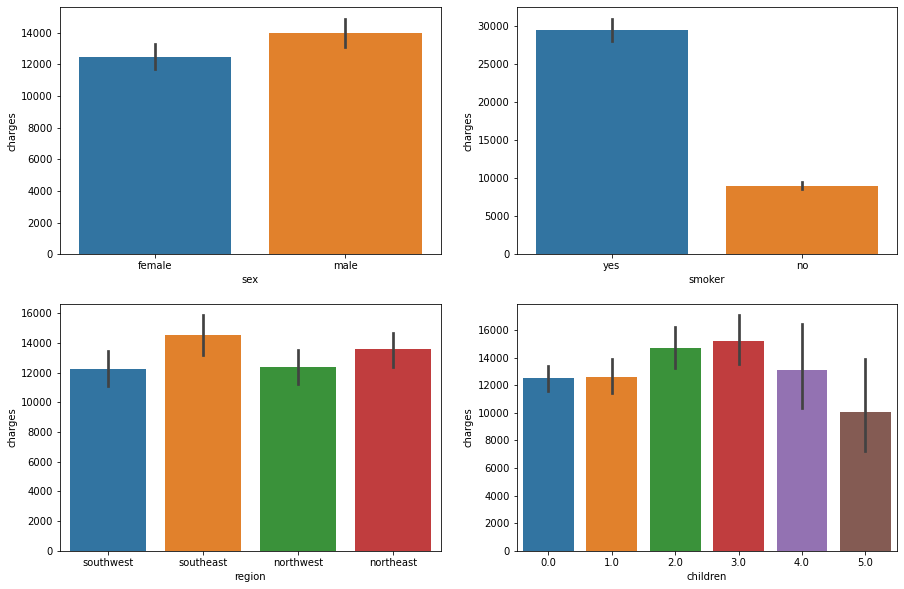

In [66]:
# bivarient analysis of categorical independent
fig,ax = plt.subplots(2,2,figsize = (15,10))
cols = ["sex","smoker","region","children"]
index = 0
for i in range(2):
    for j in range(2):
        sns.barplot(x = df[cols[index]], y = df["charges"] , ax=ax[i][j])
        index+=1

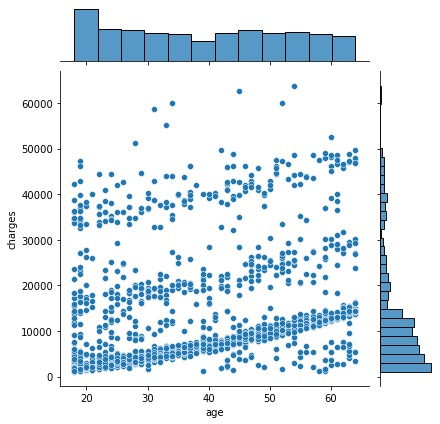

In [67]:
# bivarient analysis of countinous independent
sns.jointplot(x = df["age"] , y=df["charges"])
plt.show()

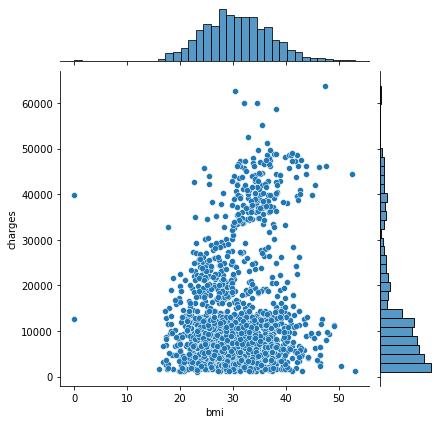

In [68]:
sns.jointplot(x = df["bmi"] , y=df["charges"])
plt.show()

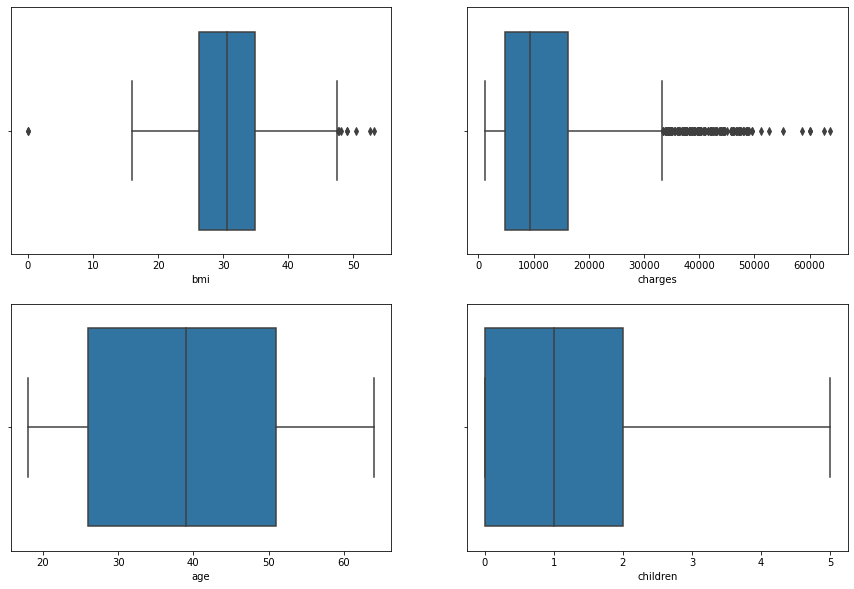

In [69]:
# outliers analysis
fig,ax = plt.subplots(2,2,figsize = (15,10))
cols = ["bmi","charges","age","children"]
index = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x = df[cols[index]], ax=ax[i][j])
        index+=1

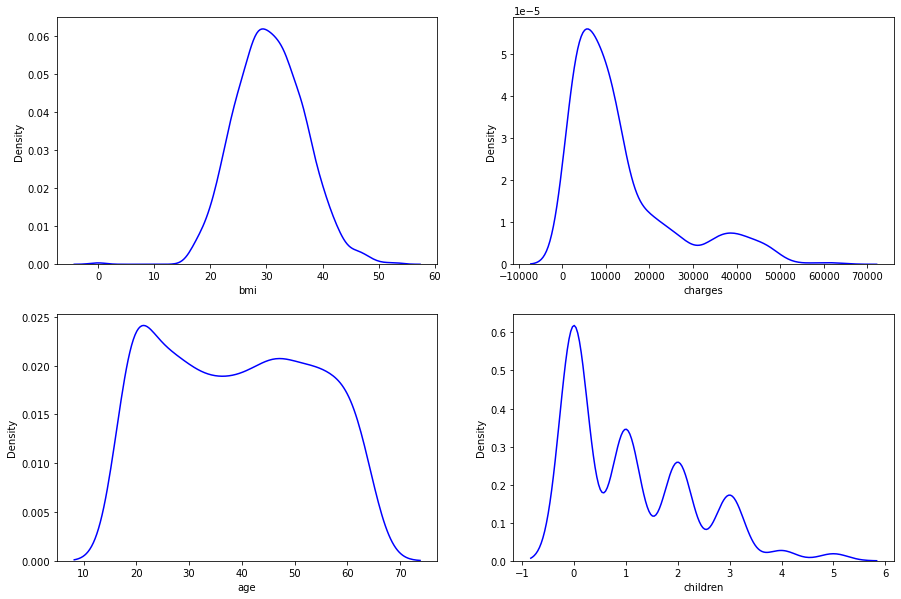

In [70]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
cols = ["bmi","charges","age","children"]
index = 0
for i in range(2):
    for j in range(2):
        sns.kdeplot(x = df[cols[index]], ax=ax[i][j] , color = "blue")
        index+=1

In [71]:
 df[df["charges"]>30000].shape

(188, 7)

In [72]:
for i in ["bmi","charges","age","children"]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3-q1
    df = df[(df[i]>=(q1-1.5*IQR)) & (df[i]<=(q3+1.5*IQR))]

In [73]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1558,42.0,male,20.300,3.0,no,southwest,1984.45330
1559,48.0,male,35.300,0.0,no,southwest,2457.50200
1560,39.0,male,24.320,0.0,no,southeast,12146.97100
1561,63.0,male,18.500,0.0,no,southwest,9566.99090


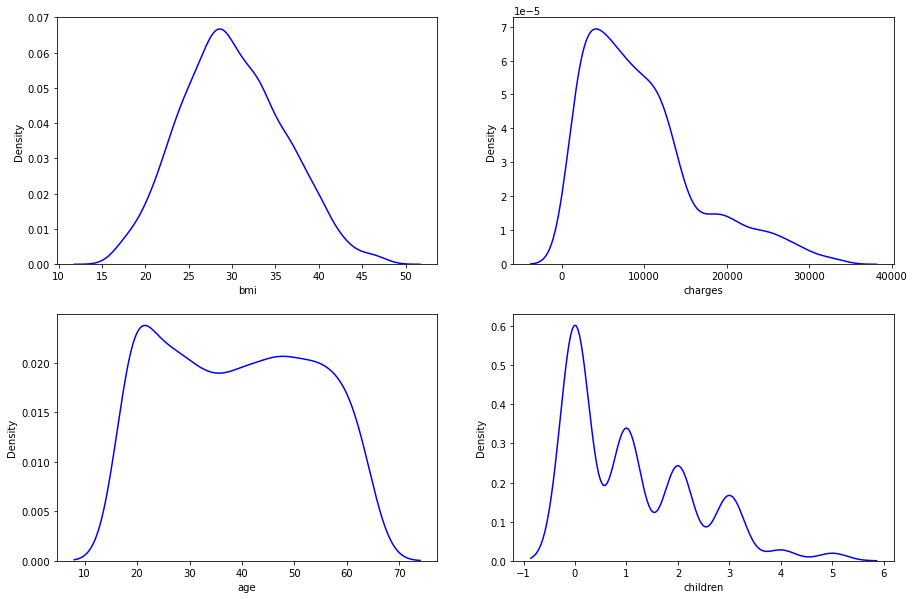

In [74]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
cols = ["bmi","charges","age","children"]
index = 0
for i in range(2):
    for j in range(2):
        sns.kdeplot(x = df[cols[index]], ax=ax[i][j] , color = "blue")
        index+=1

In [75]:
for i in ["sex","smoker","region"]:
    df = pd.get_dummies(data = df,columns = [i],drop_first=True)

In [429]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0,1,0,0,1
1,18.0,33.770,1.0,1725.55230,1,0,0,1,0
2,28.0,33.000,3.0,4449.46200,1,0,0,1,0
3,33.0,22.705,0.0,21984.47061,1,0,1,0,0
4,32.0,28.880,0.0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1558,42.0,20.300,3.0,1984.45330,1,0,0,0,1
1559,48.0,35.300,0.0,2457.50200,1,0,0,0,1
1560,39.0,24.320,0.0,12146.97100,1,0,0,1,0
1561,63.0,18.500,0.0,9566.99090,1,0,0,0,1


In [78]:
X = df.drop("charges" , axis=1).values
Y = df[["charges"]].values

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
from sklearn.linear_model import LinearRegression 
le = LinearRegression()
le.fit(X_train,Y_train)


LinearRegression()

In [86]:
le.coef_

array([[2887.68424622,  353.10881157,  462.79026291,    8.53202206,
        3389.824911  , -364.76949292, -534.00541221, -579.59010872]])

In [87]:
le.intercept_

array([9674.31063568])

In [88]:
Y_pred = le.predict(X_test)

In [89]:
from sklearn import metrics
metrics.mean_squared_error(Y_test,Y_pred)

23683263.044717163

In [90]:
# test accuracy
metrics.r2_score(Y_test,Y_pred)

0.48225340422262875

In [91]:
Y_pred_train = le.predict(X_train)

In [92]:
# train accuracy
metrics.r2_score(Y_train,Y_pred_train)

0.403967546625318

In [93]:
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.108805,0.039140,0.413281,-0.016709,-0.052321,-0.000551,-0.003469,0.001311
bmi,0.108805,1.000000,0.010886,-0.047801,0.021533,-0.228525,-0.095111,0.196960,-0.010033
children,0.039140,0.010886,1.000000,0.095275,0.032868,0.022144,0.012110,-0.019186,0.016991
charges,0.413281,-0.047801,0.095275,1.000000,-0.016294,0.468849,0.021343,-0.015354,-0.069171
sex_male,-0.016709,0.021533,0.032868,-0.016294,1.000000,0.002655,-0.002403,-0.022682,0.012625
smoker_yes,-0.052321,-0.228525,0.022144,0.468849,0.002655,1.000000,0.044274,-0.004483,-0.060490
region_northwest,-0.000551,-0.095111,0.012110,0.021343,-0.002403,0.044274,1.000000,-0.337227,-0.336573
region_southeast,-0.003469,0.196960,-0.019186,-0.015354,-0.022682,-0.004483,-0.337227,1.000000,-0.333981
region_southwest,0.001311,-0.010033,0.016991,-0.069171,0.012625,-0.060490,-0.336573,-0.333981,1.000000
